In [ ]:

# Attributions:
# * Connecting PostgreSQL database to Jupyter Notebook: [Connecting Python Pandas And Jupyter Notebooks To PostgreSQL For Data Analysis](https://blog.panoply.io/connecting-jupyter-notebook-with-postgresql-for-python-data-analysis)
# * Deploying a Jupyter Notebook Heroku with Voila: [Deploy a Jupyter Notebook Online with Voila and Heroku](https://pythonforundergradengineers.com/deploy-jupyter-notebook-voila-heroku.html#test-voila-locally)


# COVID Test/Cases/Death - National - Daily: 1/20 - 8/20

#### COVID Cases

COVID case rates from the [New York Times COVID-19 repository](https://github.com/nytimes/covid-19-data).

- `case_rate`: Confirmed COVID-19 cases per 100,000 people, seven day moving average.
- `new_case_rate`: New confirmed COVID-19 cases per 100,000 people, seven day moving average.

#### COVID Deaths

COVID death rates from the [New York Times COVID-19 repository](https://github.com/nytimes/covid-19-data).

- `death_rate`: Confirmed COVID-19 deaths per 100,000 people, seven day moving average.
- `new_death_rate`: New confirmed COVID-19 deaths per 100,000 people, seven day moving average.

#### COVID Tests

COVID test rates from the [COVID Tracking Project](https://covidtracking.com/).

- `test_rate`: Confirmed COVID-19 tests per 100,000 people, seven day moving average.
- `new_test_rate`: New confirmed COVID-19 tests per 100,000 people, seven day moving average.

In [7]:
# mplcursors provides interactive data selection cursor for Matplotlib. Disabled for Heroku deployment. 
import os
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine
from dotenv import load_dotenv

%matplotlib inline
#%pylab

load_dotenv()


conn = create_engine(os.getenv("HEROKU_POSTGRESQL_BROWN_URL"))
full_table = pd.read_sql_query('''SELECT * FROM sample WHERE month = '4';''', conn)
full_table




Python-dotenv could not parse statement starting at line 1


,index,Unnamed: 0,year,month,day,countrycode,test_rate,new_test_rate,case_rate,new_case_rate,death_rate,new_death_rate
0,71,71,2020,4,1,1000,367,32.1,65.5,6.37,1.62,.185
1,72,72,2020,4,2,1000,404,32.9,74.5,6.93,1.99,.225
2,73,73,2020,4,3,1000,444,34.2,84.3,7.58,2.41,.267
3,74,74,2020,4,4,1000,514,39.5,95.0,8.18,2.88,.312
4,75,75,2020,4,5,1000,550,40.8,103.0,8.49,3.30,.353
5,76,76,2020,4,6,1000,596,42.3,112.0,8.9,3.76,.391
6,77,77,2020,4,7,1000,643,44.1,121.0,9.16,4.44,.448
7,78,78,2020,4,8,1000,688,45.8,131.0,9.37,5.08,.494
8,79,79,2020,4,9,1000,740,48.1,142.0,9.58,5.72,.533
9,80,80,2020,4,10,1000,788,49.2,152.0,9.63,6.41,.571


In [5]:
april_data = pd.read_sql_query('''SELECT month, day, new_test_rate, new_case_rate, new_death_rate FROM sample where month = '4' ''', conn)
april_data['new_test_rate']=april_data['new_test_rate'].astype(float)
april_data['new_test_rate']=april_data['new_test_rate'].astype(int)
april_data['new_case_rate']=april_data['new_case_rate'].astype(float)
april_data['new_case_rate']=april_data['new_case_rate'].astype(int)
april_data['new_death_rate']=april_data['new_death_rate'].astype(float)


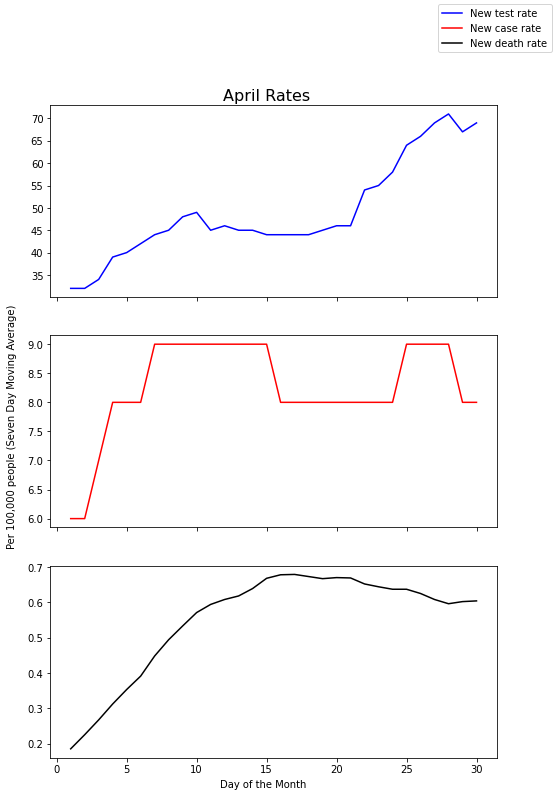

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(8,12))
fig.suptitle('April Rates', y=.9, fontsize=16)
fig.text(0.42, 0.09, "Day of the Month")
fig.text(0.05, 0.37, "Per 100,000 people (Seven Day Moving Average)",  rotation=90)
x = april_data['day']
ax1.plot(x, april_data['new_test_rate'], color = 'blue', label='New test rate') 
ax2.plot(x, april_data['new_case_rate'], color = 'red', label='New case rate')
ax3.plot(x, april_data['new_death_rate'], color = 'black', label='New death rate')
#mplcursors.cursor(hover=True)
plt.figlegend()
plt.show()